<a href="https://colab.research.google.com/github/albinovik/non_opt_course/blob/main/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%B8_%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D1%83%D0%B5%D0%BC%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**НАХОЖДЕНИЕ ПРОИЗВОДНЫХ ФУНКЦИЙ.**

Поскольку numpy работает с массивами, то вычисление производной может быть осложнено. NumPy не предоставляет общей функциональности для вычисления производных. Мы можем найти производную, например, задав функцию как полином.

In [4]:
import numpy as np

p = np.poly1d([3, 1, 3])
print(p)

   2
3 x + 1 x + 3


In [5]:
q = p.deriv()
print(q)

 
6 x + 1


Для нахождения производных лучше всего подходят приложения символьной математики. Библиотека sympy может быть рассмотрена как такой ресурс.

In [7]:
import sympy as sym

#Power rule
x = sym.Symbol('x')
f = x**5
d_f = f.diff(x)
d_f

5*x**4

In [8]:
f = sym.exp(x)*sym.cos(x)
d_f = f.diff(x)
d_f

-exp(x)*sin(x) + exp(x)*cos(x)

Можно вычислить непосредственно значение данной производной в конкретной точке.

In [9]:
f = sym.sin(4 * x**2)
d_f = f.diff(x)
d_f

8*x*cos(4*x**2)

In [ ]:
result = d_f.subs(x,2)
result

16*cos(16)

Функции, которые встречаются на практике, могут быть сколь угодно сложными. В общем случае, они зависят более, чем от одной переменной. Хотя, всегда можно зафиксировать ряд параметров функции, оставив изменяемым только один. В этом случае мы продолжаем работать с функцией одной переменной и дифференцировать её, если она, вообще, дифференцируема.

In [ ]:
f = 1 /x
d_f = f.diff(x)
d_f

-1/x**2

In [ ]:
result = d_f.subs(x,0)
result

zoo

Python выдаёт результат в виде бесконечности. Это значение предела, поскольку производная является пределом. Итак, производной в точке x=0 у функции f(x) 1/x не существует.

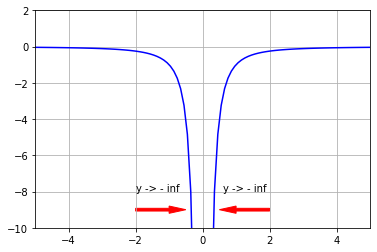

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 100)

plt.plot(x, - 1 / x**2, 'b-')
plt.xlim([-5,5])#range for x
plt.ylim([-10,2])#range for y

plt.arrow(-2, -9, 1, 0,
          head_length = 0.5,
          head_width = 0.4,
          width = 0.15,
          color = 'r')

plt.annotate('y -> - inf', xy = (-2, -8))

plt.arrow(2, -9, -1, 0,
          head_length = 0.5,
          head_width = 0.4,
          width = 0.15,
          color = 'r')

plt.annotate('y -> - inf', xy = (0.6, -8))


plt.grid()
plt.show()

**ПРОСТЕЙШИЕ ЗАДАЧИ ОПТИМИЗАЦИИ.**

Простейшие задачи оптимизации могут быть решены даже без привлечения производной, либо с нахождением производной несложной функции одного переменного. 

**Задача 1.** Зинаида является владельцем двух заводов в разных городах. На заводах
производятся абсолютно одинаковые товары, но на заводе, расположенном во
втором городе, используется более совершенное оборудование. В результате
если рабочие на заводе, расположенном в первом городе, трудятся суммарно $t^2$
часов в неделю, то за эту неделю они производят 8t единиц товара, а если
рабочие на заводе, расположенном во втором городе, трудятся суммарно $t^2$ часов
в неделю, то за эту неделю они производят 15t единиц товара. За каждый час
работы (на каждом из заводов) Зинаида платит рабочему 600 рублей. Зинаиде
нужно каждую неделю производить 578 единиц товара. Какую наименьшую
сумму придѐтся тратить еженедельно на оплату труда рабочих?

**Решение.** Необходимое количество товаров за неделю будет проиведено на обеих заводах. Это выражается формулй:

$8t_1 + 15t_2 = 578$

Если мы ищем минимальную сумму, которая будет потрачена на оплату труда рабочих, то мы подразумеваем, что суммарно на обеих заводах будет потрачено часов в неделю:

$t_1^{2} + t_2^{2}$

Эту функцию надо минимизировать. Воспользовавшись данными о количестве товара, можно переписать целевую функцию в терминах одной переменной:

$t_2 = \frac{ 578-8 t_1 }{15}$

$P(t_1) =   t_1^{2} + (\frac{ 578-8 t_1 }{15})^{2}$ 

In [10]:
import sympy as sym

t1 = sym.Symbol('t1')
f = t1**2 + ((578 - 8*t1)/15)**2
d_f = f.diff(t1)
d_f

578*t1/225 - 9248/225

In [ ]:
from sympy.solvers import solve

solve(578*t1/225 - 9248/225, t1)

[16.0000000000000]

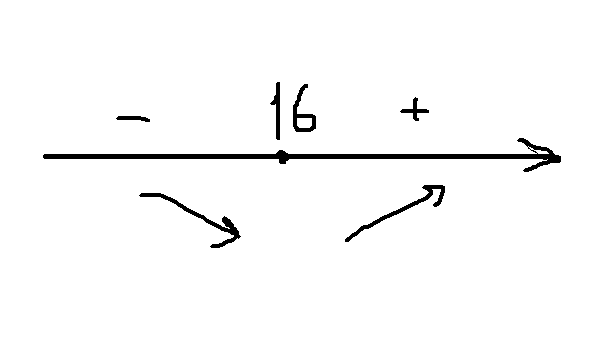

Функция имеет минимум в точке $t_1=16$. При этом $t_2 = \frac{ 578-8 t_1 }{15}= 30$. Всего человеко-часов будет:

$t_1^{2} + t_2^{2}$:

In [ ]:
f2= 16**2 + 30**2
f2

1156

И минимум на это будет потрачено:

In [ ]:
f2*600

693600

**Задача 2.** Строительство нового завода стоит 104 млн рублей. Затраты на производство х тыс. ед. продукции на таком заводе равны $f(x) = 0,5 x^2 + 2x + 6$ млн рублей в год. Если продукцию завода продать по цене g тыс. рублей за единицу, то прибыль фирмы (в млн рублей) за один год составит g*x - f(x). После окончания строительства завода фирма будет выпускать продукцию в таком количестве, чтобы прибыль была максимальной. При каком наименьшем значении g строительство завода окупится не более чем за 4 года?

Функция прибыли выглядит следующим образом:

In [ ]:
import sympy as sym

x = sym.Symbol('x')
g = sym.Symbol('g')

f3 = g*x - 0.5*x**2 - 2*x - 6

Найдем производную и решим уравнение для производной, равной нулю:

In [ ]:
f3 = f3.diff(x)
f3

g - 1.0*x - 2

In [ ]:
from sympy.solvers import solve

solve(g - x - 2, x)

[g - 2]

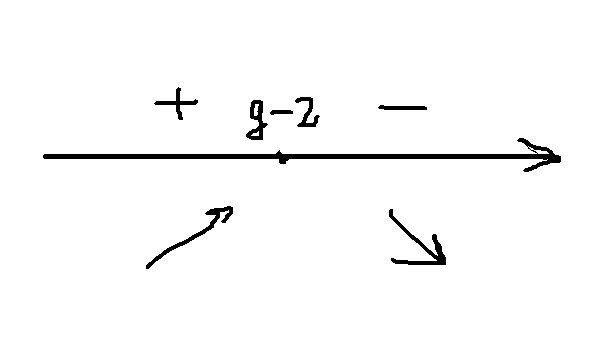

В точке $x = g -2$ функция имеет максимум. Подставим это значение в исходную функцию, наложим условие, что зстроительство окупится за 4 года (104/4=26), получим:

$g(g-2)-\frac{1}{2}(g-2)^2 - 2(g-2) -6 \geq 26$

$\frac{1}{2}g^2 - 2g - 30 \geq 0$

In [ ]:
solve((1/2)*g**2 - 2*g - 30, g)

[-6.00000000000000, 10.0000000000000]

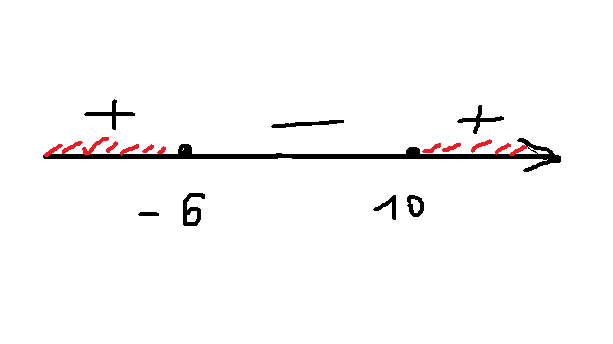

С математической точки зрения в ответ попадает два промежутка, отмеченные красным на рисунке выше. Но отрицательные значения в контексте задачи не имеют смысла. Поэтому, левый промежуток отбрасывается. В правом нужно выбрать минимальное значение согласно вопросу задачи, и это $g=10$.